# Airline Delay Prediction
### A Project for Python-Grundlagen & Anwendung in Data Science at ZHAW
#### Semester: FS 2023
#### Prof.: Maria Pelli
![Alt Text](https://t4.ftcdn.net/jpg/05/11/44/25/240_F_511442590_iFJ5ppFxiWdb2sWx0Yd3SX9RynRHMfRk.jpg)
#### By Luis Pinheiro, Sven Chen and Petar Mladenov


## 1. Context

In this project we are trying to predict whether a flight with specific parameters is going to be delayed or on time. 
The Data is acquired through a dataset and available as a csv file.
We will use two different models to predict the delay. We will compare the results and choose the best model.
Additionally we are going to include a user interface to make the prediction more accessible.

### 1.1. Identifying the Data Source

The data source used in this project is the [Kaggle Dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay) about airline delays. The dataset comes as a csv file and is stored in the `data` folder in the root of this repository. The dataset will be analyzed in the `Exploratory Data Analysis` section.

### 1.2. Data Acquisition

Information on how the data was acquired is not available. The dataset is available on Kaggle and was uploaded by [Ulrik Thyge Pedersen](https://www.kaggle.com/ulrikthygepedersen). As source only a link to [openml](https://www.openml.org/) is provided.



### 1.3. Problem statement and research questions

The dataset contains information about the departure time and length of flights, the airline, the origin and destination airports, a flight number and the information on whether a flight was delayed or not.

#### Research Question

How can we develop and compare the performance of various machine learning models to accurately predict flight delays, using factors such as departure time, flight length, airline, origin and destination airports, and flight number?

### 1.4. Goal

The goal of this project is to predict airline delays using the dataset and building different types of models and comparing them.

### 1.5. Approach and Methods

First we will analyze the dataset and perform EDA, Unifying & Transformation and Data Cleansing. Then we will decide on what models to use and train them. Finally we will evaluate the models and compare them. We want to deploy a simple frontend where users can enter information about a flight and get a prediction on whether the flight will be delayed or not using the best model.

## Explorative Datenanalyse (EDA)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data and displaying the first five rows
df = pd.read_csv('../data/airlines_delay.csv')
display(df.head())

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


### Columns

Table with the columns and their description

| Column Name | Type | Description |
| --- | --- | --- |
| Flight | Categorical value | Flight number |
| Time | Numerical value | Time of the flight in minutes of the day|
| Length | Numerical value | Length of the flight in minutes | 
| Airline | Categorical value | Airline of the flight |
| AirportFrom | Categorical value | Airport from which the flight departs |
| AirportTo | Categorical value | Airport to which the flight arrives |
| DayOfWeek | Categorical value | Day of the week of the flight where 1 = Monday|
| Class | Categorical value | Indication whether the flight is delayed -> 1 is delayed, 0 is not delayed |


In [3]:
#Checking the info of the data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB
None


In [4]:
# Describing the dataset with different statistical measures
display(df.describe())

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [5]:
#counting unique values in each column
display(df.nunique())

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64

In [6]:
# Show the max Length and the min Length
print(f"Max length: {df['Length'].max()}, Min length: {df['Length'].min()}")


Max length: 655.0, Min length: 0.0


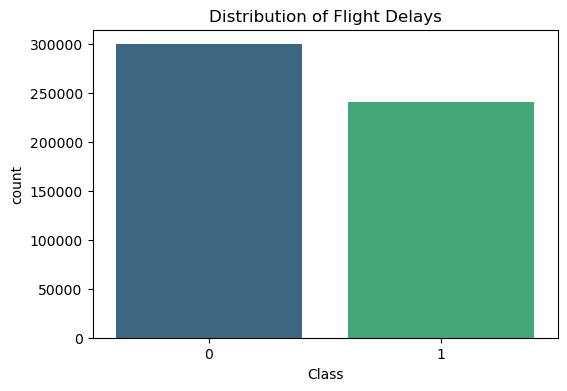

In [7]:
# Using seaborn to plot the distribution of the data
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribution of Flight Delays')
plt.show()


###### As we can see the distribution of the flight delays is close to being almost 50/50. This is good for our model as it will not be biased towards one class.

In [8]:
# Count the amount of delayed flights and not delayed flights
display(df['Class'].value_counts())

0    299118
1    240264
Name: Class, dtype: int64

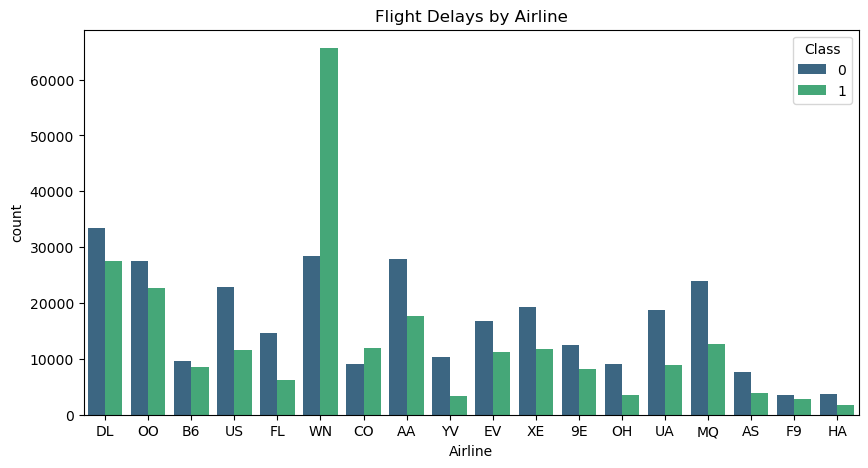

In [9]:
# Plotting the delay by airline
plt.figure(figsize=(10, 5))
sns.countplot(x='Airline', hue='Class', data=df, palette='viridis')
plt.title('Flight Delays by Airline')
plt.show()

###### The flight delays by airlines analysis shows that WN has the most delays and HA has the least delays. This is probably due to the fact that WN has the most flights and HA has the least flights. We can see that the airlines with the most flights have the most delays and the airlines with the least flights have the least delays.

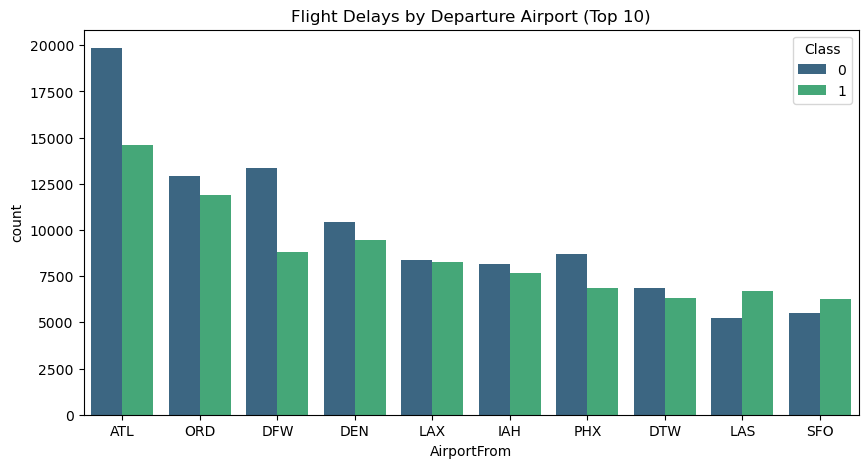

In [10]:
# Plotting the delay by departure airport and only showing the top 10 because there are too many airports to show on the graph 
top_10_airports = df['AirportFrom'].value_counts().iloc[:10].index
plt.figure(figsize=(10, 5))
sns.countplot(x='AirportFrom', hue='Class', data=df, order=top_10_airports, palette='viridis')
plt.title('Flight Delays by Departure Airport (Top 10)')
plt.show()



###### If we compare the delays by departure airport, we identify that Atlanta hast the most flights and the most delays. This is probably due to the fact that Atlanta is the busiest airport in the world. We can see that the airports with the most flights have the most delays and the airports with the least flights have the least delays.

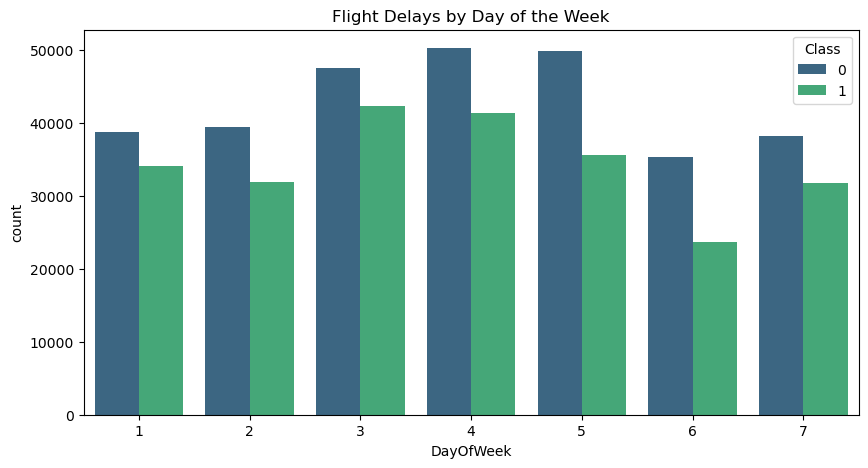

In [11]:
# Flight delays by day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', hue='Class', data=df, palette='viridis')
plt.title('Flight Delays by Day of the Week')
plt.show()

###### Wednesday, Thursday and Friday have the most flights. But even though Thursday and Friday have almost the same amount of flights, Thursday has more delays than Friday.

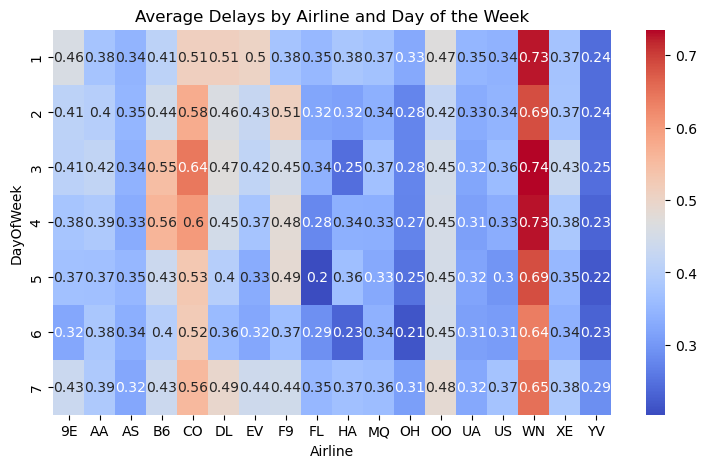

In [12]:
#Additional Bivariate Analysis: Average delays by Airline and Day of the Week
pivot_table = df.pivot_table(values='Class', index='DayOfWeek', columns='Airline', aggfunc=np.mean)
plt.figure(figsize=(9,5))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Average Delays by Airline and Day of the Week')
plt.show()

###### The Bivariate Analysis shows that WN has high delays count with the box being red. We can also identify that weekends have less delays than weekdays. 

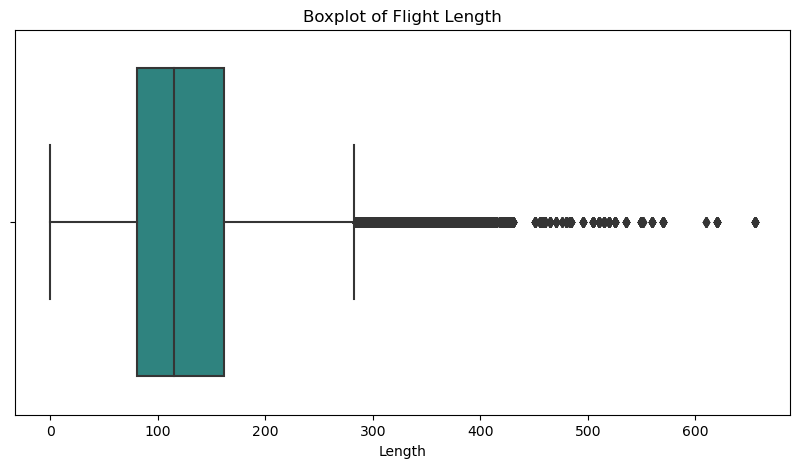

In [13]:
# Identifying and handling outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Length'], palette='viridis')
plt.title('Boxplot of Flight Length')
plt.show()

###### The boxplot of the outliers are mostly after around 300 minutes and most of the flights are around 100 minutes. We will remove the outliers in the data cleansing step.

## Unifying & Transformation

In [14]:
#Display data types
print(df.dtypes)

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object


In [15]:
# Change categorical columns to be a category data type
cols_to_convert = [col for col in df.columns if df[col].dtype=='object']
df[cols_to_convert] = df[cols_to_convert].astype('category')

# Display dataframe types
print(df.dtypes)


Flight          float64
Time            float64
Length          float64
Airline        category
AirportFrom    category
AirportTo      category
DayOfWeek         int64
Class             int64
dtype: object


###### We convert the the categorial columns to be a category type instead of object type. The advantage of using the 'category' data type is that it often uses less memory and can speed up operations such as grouping, sorting, and plotting.  

In [16]:
# Rename column  from Class to Delayed
df.rename(columns={'Class':'Delayed'}, inplace=True)

In [17]:
# Drop Flight column
df.drop('Flight', axis=1, inplace=True)


In [18]:
# Display first 5 rows of the dataframe
display(df.head())

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Delayed
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0


## Data Cleansing

In [19]:
# Display the number of null values in each column
print(df.isnull().sum())


Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Delayed        0
dtype: int64


In [20]:
# Drop all rows with missing values
df.dropna(inplace=True)


In [21]:
# Handling duplicate rows
df.drop_duplicates(inplace=True)

In [22]:
# Display the shape of the dataframe 
print(df.shape)  

(315753, 7)


In [23]:
# Handle outliers by removing the first 0.25 and last 0.25 quantile
q1 = df['Length'].quantile(0.25) # first quantile
q3 = df['Length'].quantile(0.75) # last quantile
iqr = q3 - q1
df = df[(df['Length'] > (q1 - 1.5 * iqr)) & (df['Length'] < (q3 + 1.5 * iqr))]

# Display the shape of the dataframe
print(df.shape)


(300193, 7)


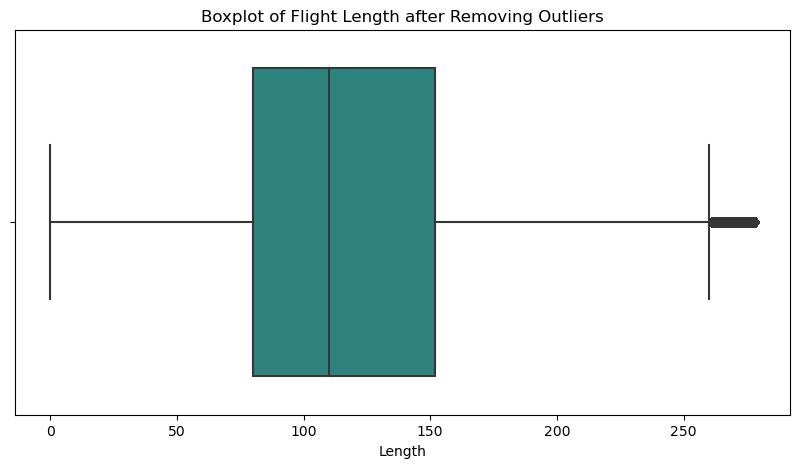

In [24]:
# Show outliers in the Length column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Length'], palette='viridis')
plt.title('Boxplot of Flight Length after Removing Outliers')
plt.show()

In [25]:
# Count the number of rows where Length is smaller than 5
print(f"Rows where length < 5 after removing outliers: {len(df[df['Length'] < 5])}")




Rows where length < 5 after removing outliers: 4


In [26]:
# Drop all rows where Length is smaller than 5
df = df[df['Length'] > 5]


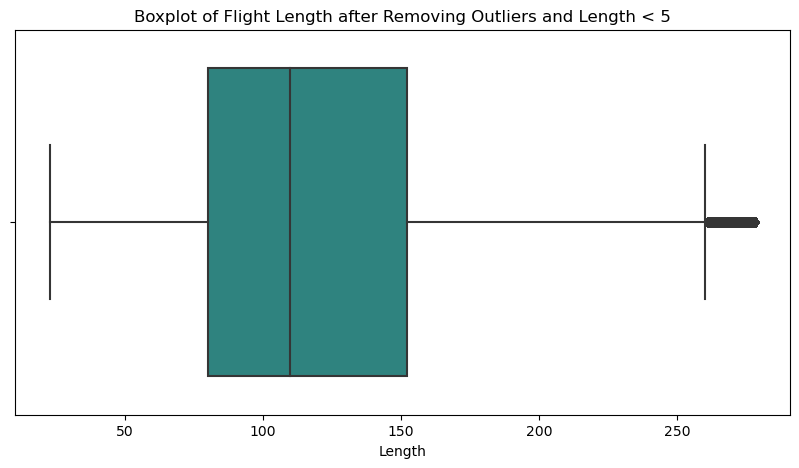

In [27]:
# Show change of outliers after removing them
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Length'], palette='viridis')
plt.title('Boxplot of Flight Length after Removing Outliers and Length < 5')
plt.show()

In [28]:
# Show the max Length and the min Length after removing outliers
print(f"Max length after cleaning: {df['Length'].max()}, Min length after cleaning: {df['Length'].min()}")


Max length after cleaning: 278.0, Min length after cleaning: 23.0


In [29]:
# Checking correlation of numeric features
correlation_matrix = df.corr(numeric_only=True)

# Displaying the correlation matrix
display(correlation_matrix)

,Time,Length,DayOfWeek,Delayed
Time,1.000000,-0.052204,0.002195,0.095404
Length,-0.052204,1.000000,0.012072,0.021701
DayOfWeek,0.002195,0.012072,1.000000,-0.020839
Delayed,0.095404,0.021701,-0.020839,1.000000


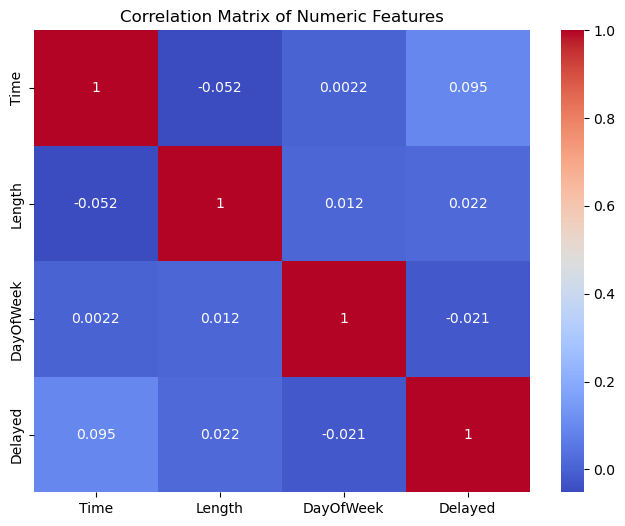

In [30]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

###### The correlation matrix shows that the correlation between the columns is very low. This means that we can keep all the columns for our model.

In [31]:
import json

def extract_code_from_ipynb(ipynb_file):
    with open(ipynb_file) as f:
        data = json.load(f)

    code_blocks = []
    for cell in data['cells']:
        if cell['cell_type'] == 'code':
            code_blocks.append(''.join(cell['source']))

    return code_blocks

code_blocks = extract_code_from_ipynb('AirlineDelay.ipynb')

# To print the code blocks
for code in code_blocks:
    print(code)


#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the data and displaying the first five rows
df = pd.read_csv('../data/airlines_delay.csv')
display(df.head())
#Checking the info of the data
print(df.info())

# Describing the dataset with different statistical measures
display(df.describe())
#counting unique values in each column
display(df.nunique())
# Show the max Length and the min Length
print(f"Max length: {df['Length'].max()}, Min length: {df['Length'].min()}")

# Using seaborn to plot the distribution of the data
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribution of Flight Delays')
plt.show()

# Count the amount of delayed flights and not delayed flights
display(df['Class'].value_counts())
# Plotting the delay by airline
plt.figure(figsize=(10, 5))
sns.countplot(x='Airline', hue='Class', data=df, palette='viridis')
plt.title('Flight Delays by Ai